# Домашнее задание 2 - предобработка признаков, pandas


### О задании

Практическое задание 2 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания получившийся файл \*.ipynb с решением необходимо выложить в свой репозиторий github.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [103]:
import numpy as np

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [104]:
def max_element(arr):
    if np.prod(arr) == 0:
        return max(arr[1:][(arr == 0)[:-1]])
    else:
        return None

In [105]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
max_element(x)

5

**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [106]:
def nearest_value(X, v):
    X = X.ravel()
    return X[np.abs(X - v).argmin()]

In [107]:
x = np.arange(0,10).reshape((2, 5))
v = 3.6
nearest_value(x, v)

4

**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [108]:
def scale(X):
    M = np.mean(X, 0)
    S = np.std(X, 0)
    if 0 not in S: return (X - M)/S

In [ ]:
A = np.random.randint(1, 10, (3, 5))
print(A)
print(scale(A))

**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [ ]:
def get_stats(X):
    return np.linalg.det(X), np.trace(X), np.min(X), np.max(X), np.linalg.norm(X), np.linalg.eig(X)[0], np.linalg.inv(X)

In [111]:
A = np.random.normal(10, 1, (3, 3))

print('Определитель: ', get_stats(A)[0])
print('След: ', get_stats(A)[1])
print('Наименьший элемент: ', get_stats(A)[2])
print('Наибольший элемент: ', get_stats(A)[3])
print('Норма Фробениуса: ', get_stats(A)[4])
print('Собственные числа: ', get_stats(A)[5])
print('Обратная матрица: ', get_stats(A)[6])

Определитель:  8.261157528302459
След:  33.18583920195054
Наименьший элемент:  9.161173399621171
Наибольший элемент:  12.884825601734352
Норма Фробениуса:  31.03320092776979
Собственные числа:  [30.89398145  2.16854783  0.12330992]
Обратная матрица:  [[ 0.28515921 -0.15641416 -0.10806752]
 [ 2.4167754   2.60681975 -5.54445892]
 [-2.70724624 -2.40389868  5.71117551]]


**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [112]:
s = np.empty(100)
for exp_num in range(100):
    A = np.random.normal(0, 1, (10, 10))
    B = np.random.normal(0, 1, (10, 10))
    s[exp_num] = np.max(np.dot(A, B))
print(s, '\n\n')
print('Cреднее значение по экспериментам у максимальных элементов: ', np.mean(s))
print('95-процентная квантиль: ', np.quantile(s, 0.95))

[ 8.81775386  9.00887154 12.00487851 10.66467835  7.05283687  7.40709188
 10.27294304  6.14188745  9.20134038  7.24559878  6.96367884  7.8851791
  5.97342517  9.2393599   8.18198529  6.61370027  5.46762018  4.19656951
  5.25307057  6.79875759  7.37651665  8.55583352  7.28733771  7.91020656
 12.86824147  7.63854309  6.26800165  9.94781093  9.52502615  5.31900951
  6.7154432   5.9480042  11.20709455  7.92551693  7.06616356  7.92939765
  5.61931843  7.35123369  8.51988197  7.16052669 10.36163831  8.80740053
  7.38982744  5.51417621  8.69575586  5.47505612  7.86763632 12.37004275
  9.90724806  6.75908042  5.97082208  8.99876952  9.61467814  8.75605593
  7.46034111  9.97705392  9.98401314  9.40890074  5.91974169  8.35219153
  8.49632798  9.82868606  9.87660247  8.26272605  7.8164915   7.14346315
  8.91358717  6.47581675  8.55711345 12.01973427  5.92476793  8.334341
  7.35482986  8.58718529 11.58951772  5.34786199  8.97890061  8.64571419
  6.95704151  9.18904209  8.40985182  7.71053547  7.67

### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

Данные находятся в приложенном файле `2008.csv`. Их [описание](http://stat-computing.org/dataexpo/2009/the-data.html) приведено ниже:

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [113]:
import pandas as pd
%matplotlib inline

In [114]:
data = pd.read_csv("2008.csv")
data

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69997,2008,9,24,3,1012.0,1012,1132.0,1132,YV,7058,...,7.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0


**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [115]:
cancell = data.groupby('CancellationCode')[['Cancelled']].count()
cancell.loc[cancell['Cancelled'] == cancell['Cancelled'].max()]

,Cancelled
CancellationCode,
A,563


**Ответ:** Наиболее частая причина отмены рейса: А - carrier (перевозчик)

**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [116]:
#'Distance in miles'
#'TailNum'
#data.groupby('TailNum')[['Distance']].sum()

print('Минимальное расстояние: ', data['Distance'].min(), 'miles')
print('Максимальное расстояние: ', data['Distance'].max(), 'miles')
print('Среднее расстояние: ', data['Distance'].mean(), 'miles')

Минимальное расстояние:  31 miles
Максимальное расстояние:  4962 miles
Среднее расстояние:  724.5082571428571 miles


**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [117]:
data[data["Distance"] == 31][["Origin", "Dest"]]

,Origin,Dest
1116,WRG,PSG
6958,WRG,PSG
17349,PSG,WRG
27534,PSG,WRG
46082,WRG,PSG
48112,PSG,WRG


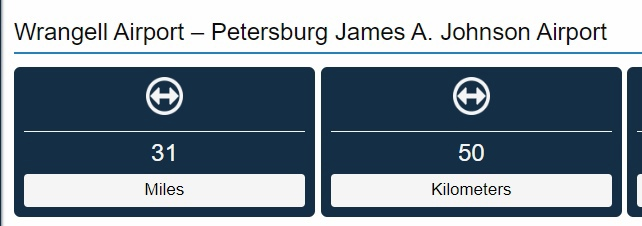

In [118]:
from PIL import Image
img = Image.open('distance.jpg')
img

**Ответ:** Минимальное расстояние не подозрительно, соответствует расстоянию между аэропортами

In [119]:
minimum = data['Distance'].min()
data['Distance'].dtypes
min_dis = data[data['Distance'] == minimum][['Month', 'DayofMonth', 'DayOfWeek', 'FlightNum']]
min_dis

,Month,DayofMonth,DayOfWeek,FlightNum
1116,12,30,2,65
6958,12,26,5,65
17349,8,18,1,64
27534,3,11,2,64
46082,8,9,6,65
48112,2,28,4,64


**Ответ:** На рейсах 64 и 65

Расстояние, пройденное этими же рейсами в другие дни:

In [120]:
#n = list(set(min_dis['FlightNum']))
#dis = data[(data['Distance'] != 31) & (data['FlightNum'] in n)][['FlightNum', 'Distance']]

dis = data[(data['Distance'] != minimum) & ((data['FlightNum'] == 64) | (data['FlightNum'] == 65))][['FlightNum', 'Distance']]
dis

,FlightNum,Distance
501,64,533
1389,64,680
1517,65,680
2619,64,2381
3869,64,82
...,...,...
66529,65,82
67172,64,533
68264,65,386
68338,65,2454


**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [121]:
airports = data.groupby('Origin')[['Distance']].count()
airports.loc[airports['Distance'] == airports['Distance'].max()]

,Distance
Origin,
ATL,4134


**Ответ:** ATL - аэропорт Атланта

**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [122]:
m = data.groupby('Origin')[['AirTime']].mean()
m.loc[m['AirTime'] == m['AirTime'].max()]

,AirTime
Origin,
SJU,205.2


**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [123]:
airport = data.copy().groupby("Origin").filter(lambda x: len(x) > 999)
airport

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7,2008,4,22,2,1815.0,1820,2057.0,2131,DL,617,...,9.0,31.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
8,2008,3,4,2,626.0,630,820.0,830,WN,454,...,4.0,6.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69992,2008,11,4,2,754.0,801,1027.0,1039,UA,885,...,5.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69993,2008,2,28,4,1410.0,1400,1501.0,1455,MQ,3547,...,5.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0


In [124]:
airport = data.copy()
airport = airport.groupby('Origin').filter(lambda x: len(x) > 999)
airport = airport[['Origin', 'DepDelay']]

airport['quantity'] = airport.groupby('Origin').transform('count')
airport = airport[airport['DepDelay'] > 0]
airport['quantityDepDelay'] = airport.groupby('Origin')['DepDelay'].transform('count')
airport = airport.drop_duplicates('Origin')

airport['proportion'] = airport['quantityDepDelay'] / airport['quantity']
airport[airport['proportion'] == airport['proportion'].max()][['Origin', 'proportion']]

,Origin,proportion
79,EWR,0.528667


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [125]:
df = pd.read_csv("2008.csv")

In [126]:
df.isnull().sum()

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime               1399
CRSDepTime               0
ArrTime               1556
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                820
ActualElapsedTime     1582
CRSElapsedTime           9
AirTime               1582
ArrDelay              1582
DepDelay              1399
Origin                   0
Dest                     0
Distance                 0
TaxiIn                1556
TaxiOut               1406
Cancelled                0
CancellationCode     68589
Diverted                 0
CarrierDelay         54747
WeatherDelay         54747
NASDelay             54747
SecurityDelay        54747
LateAircraftDelay    54747
dtype: int64

**Ответ:** Имеются

Количество пропущенных элементов в таблице "объект-признак":

In [127]:
df.isnull().sum().sum()

355215

Количество объектов c пропусками: 

In [128]:
sum(df.isnull().sum(axis=1).values != 0)

70000

Количество признаков c пропусками:

In [129]:
sum(df.isnull().sum().values != 0)

16

Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [130]:
df['DepDelay'].isnull().sum()

1399

**Ответ:** Имеются

In [131]:
df.loc[df['DepDelay'].isnull()]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
11,2008,3,6,4,NaN,1605,NaN,1940,AA,484,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
78,2008,1,19,6,NaN,750,NaN,930,EV,4772,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
103,2008,7,24,4,NaN,1230,NaN,1355,FL,816,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
112,2008,2,4,1,NaN,620,NaN,758,NW,1281,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
128,2008,1,21,1,NaN,1838,NaN,2005,UA,1251,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69818,2008,6,9,1,NaN,1645,NaN,1800,MQ,3627,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
69836,2008,1,25,5,NaN,938,NaN,1030,MQ,3254,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
69884,2008,12,26,5,NaN,1935,NaN,2116,NW,1430,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
69918,2008,3,1,6,NaN,600,NaN,742,EV,4715,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


In [132]:
df.loc[(df['DepDelay'].isnull()) & (df['Cancelled'] == 1)]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
11,2008,3,6,4,NaN,1605,NaN,1940,AA,484,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
78,2008,1,19,6,NaN,750,NaN,930,EV,4772,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
103,2008,7,24,4,NaN,1230,NaN,1355,FL,816,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
112,2008,2,4,1,NaN,620,NaN,758,NW,1281,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
128,2008,1,21,1,NaN,1838,NaN,2005,UA,1251,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69818,2008,6,9,1,NaN,1645,NaN,1800,MQ,3627,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
69836,2008,1,25,5,NaN,938,NaN,1030,MQ,3254,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
69884,2008,12,26,5,NaN,1935,NaN,2116,NW,1430,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
69918,2008,3,1,6,NaN,600,NaN,742,EV,4715,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


**Ответ:** Все рейсы, у которых яйчейка DepDelay пропущена (нет информации о задержке), были отменены (Cancelled = 1). Самолет не мог вылететь раньше, вовремя, либо задержаться.

Значения целевой переменной имеются и неравны 0:

In [133]:
df_new = df.loc[(df['DepDelay'].isnull() != True) & (df['DepDelay'] != 0)]
df_new

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,2008,1,26,6,920.0,925,1110.0,1118,OH,5218,...,12.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0


In [134]:
DepDelay_vector = df_new['DepDelay'].values
DepDelay_vector

array([16., 16., -2., ..., 24.,  6., -1.])

In [135]:
df_new = df_new.drop('DepDelay', axis=1)

**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [136]:
time = df_new['DepTime']
df_new.insert(loc = 5, column = 'DepTime_Hour', value = time // 100)
df_new.insert(loc = 6, column = 'DepTime_Minute', value = time % 100)
df_new = df_new.drop('DepTime', axis=1)

In [137]:
time = df_new['CRSDepTime']
df_new.insert(loc = 7, column = 'CRSDepTime_Hour', value = time // 100)
df_new.insert(loc = 8, column = 'CRSDepTime_Minute', value = time % 100)
df_new = df_new.drop('CRSDepTime', axis=1)

In [138]:
time = df_new['ArrTime']
df_new.insert(loc = 9, column = 'ArrTime_Hour', value = time // 100)
df_new.insert(loc = 10, column = 'ArrTime_Minute', value = time % 100)
df_new = df_new.drop('ArrTime', axis=1)

In [139]:
time = df_new['CRSArrTime']
df_new.insert(loc = 11, column = 'CRSArrTime_Hour', value = time // 100)
df_new.insert(loc = 12, column = 'CRSArrTime_Minute', value = time % 100)
df_new = df_new.drop('CRSArrTime', axis=1)

In [140]:
df_new

,Year,Month,DayofMonth,DayOfWeek,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,21.0,11.0,20,55,23.0,8.0,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,14.0,26.0,14,10,17.0,30.0,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,11.0,43.0,11,45,15.0,1.0,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,11.0,41.0,11,44,13.0,23.0,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,8.0,15.0,8,20,12.0,43.0,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,2008,1,26,6,9.0,20.0,9,25,11.0,10.0,...,12.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69995,2008,5,12,1,18.0,29.0,18,40,21.0,37.0,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,11.0,49.0,11,25,13.0,36.0,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69998,2008,2,18,1,19.0,6.0,19,0,22.0,0.0,...,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0


**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [141]:
df_new.corrwith(df['DepDelay'], numeric_only = True).sort_values() * 100

C:\Python310\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Python310\lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Month                -2.952844
DepTime_Minute       -1.705481
Cancelled            -0.112260
ArrTime_Minute        0.617138
DayOfWeek             0.853008
DayofMonth            0.857381
CRSArrTime_Minute     0.860928
SecurityDelay         1.066793
TaxiIn                2.064043
FlightNum             2.116645
CRSDepTime_Minute     2.243733
Distance              2.425239
AirTime               2.523730
Diverted              2.716621
CRSElapsedTime        3.430187
ActualElapsedTime     4.194606
ArrTime_Hour          7.018111
TaxiOut              10.129419
CRSArrTime_Hour      13.556087
CRSDepTime_Hour      14.008449
NASDelay             17.159058
DepTime_Hour         20.312457
WeatherDelay         23.887224
CarrierDelay         53.269618
LateAircraftDelay    55.380590
ArrDelay             93.352594
Year                       NaN
dtype: float64

In [142]:
df_new.filter(regex='Delay')

,ArrDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,8.0,NaN,NaN,NaN,NaN,NaN
1,2.0,NaN,NaN,NaN,NaN,NaN
2,-19.0,NaN,NaN,NaN,NaN,NaN
3,-12.0,NaN,NaN,NaN,NaN,NaN
4,-17.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
69994,-8.0,NaN,NaN,NaN,NaN,NaN
69995,-12.0,NaN,NaN,NaN,NaN,NaN
69996,22.0,0.0,0.0,0.0,0.0,22.0
69998,21.0,0.0,0.0,15.0,0.0,6.0


Признаки, которые сильно коррелируют, могут ухудшить прогноз. Скорее всего, значения будут отсутствовать, т.к они зависят от DepDelay (а задержка отсутствует)

In [143]:
df_new = df_new.drop(['ArrDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], axis=1)

In [144]:
df_new = df_new.drop('TailNum', axis=1)
df_new = df_new.drop('Year', axis=1)
df_new

,Month,DayofMonth,DayOfWeek,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,...,CRSElapsedTime,AirTime,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
0,6,18,3,21.0,11.0,20,55,23.0,8.0,23,...,65.0,46.0,MDW,CLE,307,3.0,8.0,0,NaN,0
1,6,4,3,14.0,26.0,14,10,17.0,30.0,17,...,138.0,108.0,IAH,AVL,834,4.0,12.0,0,NaN,0
2,8,3,7,11.0,43.0,11,45,15.0,1.0,15,...,155.0,125.0,MDW,TPA,997,4.0,9.0,0,NaN,0
3,1,23,3,11.0,41.0,11,44,13.0,23.0,13,...,111.0,79.0,SLC,FCA,532,4.0,19.0,0,NaN,0
4,5,4,7,8.0,15.0,8,20,12.0,43.0,13,...,160.0,136.0,LAS,AUS,1090,4.0,8.0,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,1,26,6,9.0,20.0,9,25,11.0,10.0,11,...,113.0,85.0,CVG,BDL,661,12.0,13.0,0,NaN,0
69995,5,12,1,18.0,29.0,18,40,21.0,37.0,21,...,129.0,86.0,ORD,ATL,606,22.0,20.0,0,NaN,0
69996,5,11,7,11.0,49.0,11,25,13.0,36.0,13,...,49.0,30.0,ORD,GRR,137,4.0,13.0,0,NaN,0
69998,2,18,1,19.0,6.0,19,0,22.0,0.0,21,...,219.0,192.0,RSW,MSP,1416,20.0,22.0,0,NaN,0


**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

<Axes: >

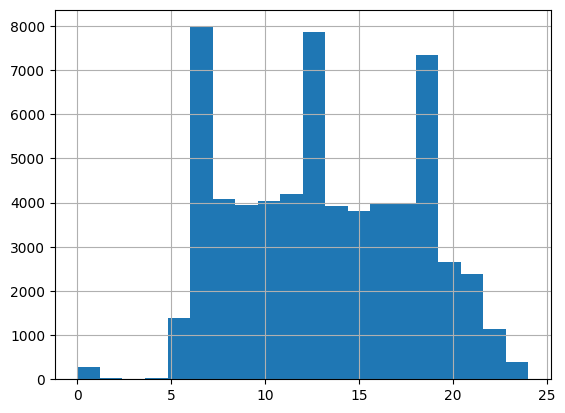

In [145]:
df_new['DepTime_Hour'].hist(bins=20)

<Axes: >

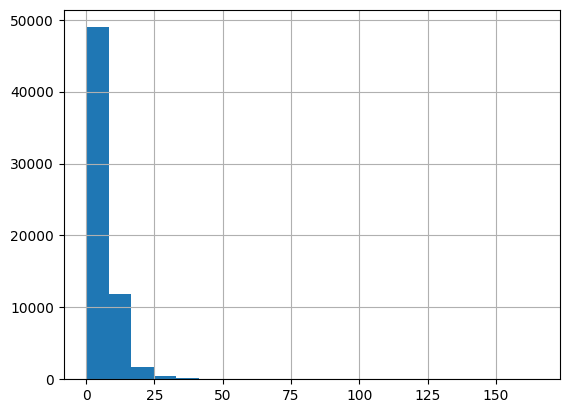

In [146]:
df_new['TaxiIn'].hist(bins=20)

<Axes: >

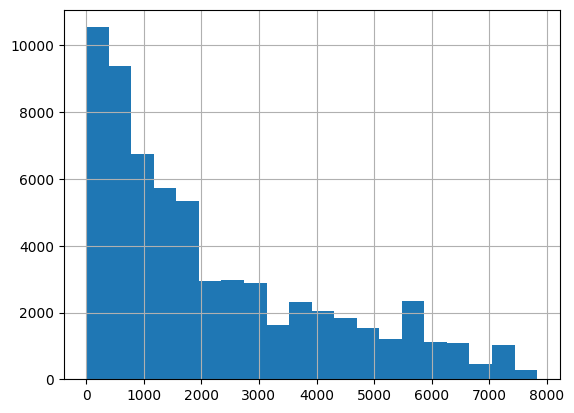

In [147]:
df_new['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

**Ответ:** У графиков слишком большой разброс данных, что может помешать в обучении. Масштабирование преобразует значения в определенный диапазон (меньший), сделав веса более приемлимыми для дальнейшей работы

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [148]:
from sklearn.preprocessing import StandardScaler

In [149]:
def transform_data(data):
    columns = df_new.select_dtypes(include=['object']).columns
    data[columns] = data[columns].fillna('nan')
    columns = df_new.select_dtypes(include=['int64', 'float64']).columns
    data[columns] = data[columns].fillna(0)
    scaler = StandardScaler()
    data[columns] = scaler.fit_transform(data[columns])
    data = pd.get_dummies(data)
    return data

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [150]:
df_new = transform_data(df_new)

In [151]:
df_new

,Month,DayofMonth,DayOfWeek,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,...,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM,CancellationCode_A,CancellationCode_B,CancellationCode_nan
0,-0.118281,0.256485,-0.462767,1.656383,-1.080604,1.512432,1.586498,1.663973,-1.234084,1.725956,...,False,False,False,False,False,False,False,False,False,True
1,-0.118281,-1.332050,-0.462767,0.195583,-0.232910,0.214011,-0.936014,0.489585,0.034340,0.481702,...,False,False,False,False,False,False,False,False,False,True
2,0.467662,-1.445517,1.541454,-0.430474,0.727811,-0.435199,1.025940,0.098122,-1.637673,0.066951,...,False,False,False,False,False,False,False,False,False,True
3,-1.583137,0.823819,-0.462767,-0.430474,0.614785,-0.435199,0.969884,-0.293341,-0.369249,-0.347800,...,False,False,False,False,False,False,False,False,False,True
4,-0.411252,-1.332050,1.541454,-1.056531,-0.854552,-1.084410,-0.375456,-0.489072,0.783864,-0.347800,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,-1.583137,1.164220,1.040399,-0.847846,-0.571987,-0.868006,-0.095177,-0.684804,-1.118773,-0.762551,...,False,False,False,False,False,False,False,False,False,True
69995,-0.411252,-0.424316,-1.464878,1.030326,-0.063371,1.079625,0.745661,1.272510,0.437930,1.311205,...,False,False,False,False,False,False,False,False,False,True
69996,-0.411252,-0.537783,1.541454,-0.430474,1.066889,-0.435199,-0.095177,-0.293341,0.380274,-0.347800,...,False,False,False,False,False,False,False,False,False,True
69998,-1.290166,0.256485,-1.464878,1.239011,-1.363169,1.296028,-1.496572,1.468242,-1.695329,1.311205,...,False,False,False,False,False,False,False,False,False,True


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [152]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_new, DepDelay_vector, train_size = 0.7, random_state = 42)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [153]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [154]:
model = LinearRegression()
q = 1000
X_q_train, y_q_train = X_train[:q], y_train[:q]

model.fit(X_q_train, y_q_train)

y_q_train_pred = model.predict(X_q_train)
y_pred = model.predict(X_test)

print('Значения на подвыборке:')
print('MSE:', mean_squared_error(y_q_train, y_q_train_pred))
print('R2:', model.score(X_q_train, y_q_train))

print('Значения на контрольной выборке:')
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', model.score(X_test, y_test))

Значения на подвыборке:
MSE: 563.9120473632812
R2: 0.4679154774653651
Значения на контрольной выборке:
MSE: 3.423554712835794e+29
R2: -2.5593437587051394e+26


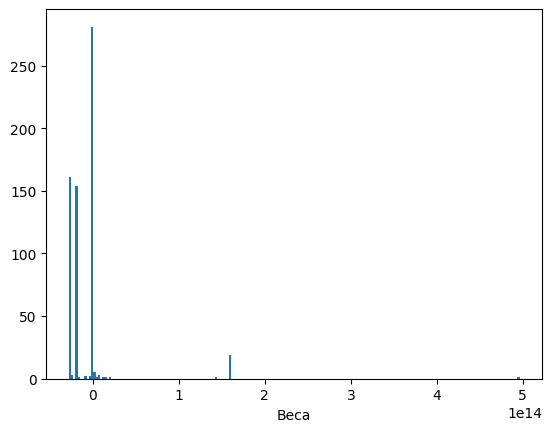

In [155]:
import matplotlib.pyplot as plt

plt.hist(model.coef_, bins = 200)
plt.xlabel('Веса')
None

**Ответ:** Почти все веса имеют значение около нуля. Могу предположить, что причиной плохих прогнозов мог оказаться маленький размер выборки. Необходимо больше элементов для более качественного обучения

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

__18. (1 балл) __ Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

In [156]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
L1 = Lasso()
L2 = Ridge()
L1 = L1.fit(X_train, y_train)
L2 = L2.fit(X_train, y_train)

eps = 10 ** (-4)
print('Coef Lasso: ', sum(abs(L1.coef_) < eps))
print('Coef Ridge: ', sum(abs(L2.coef_) < eps))

Coef Lasso:  632
Coef Ridge:  8


In [158]:
alpha = 10 ** np.linspace(-3, 3, 20)
l1 = []
l2 = []

for a in alpha:
    L1 = Lasso(a)
    L2 = Ridge(a)
    L1 = L1.fit(X_train, y_train)
    L2 = L2.fit(X_train, y_train)

    eps = 10 ** (-5)
    l1.append(sum(abs(L1.coef_) < eps))
    l2.append(sum(abs(L2.coef_) < eps))

C:\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.301e+07, tolerance: 5.694e+03
  model = cd_fast.enet_coordinate_descent(
C:\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.950e+06, tolerance: 5.694e+03
  model = cd_fast.enet_coordinate_descent(


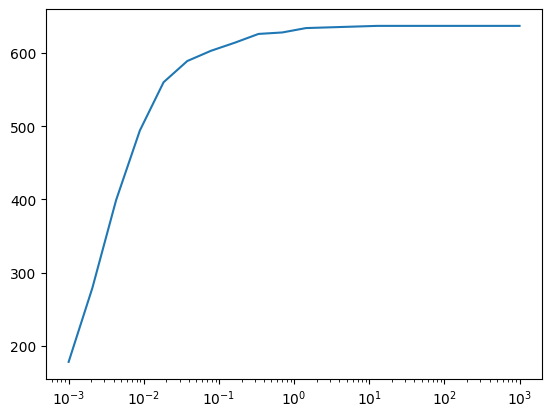

In [159]:
plt.semilogx(alpha, l1) 

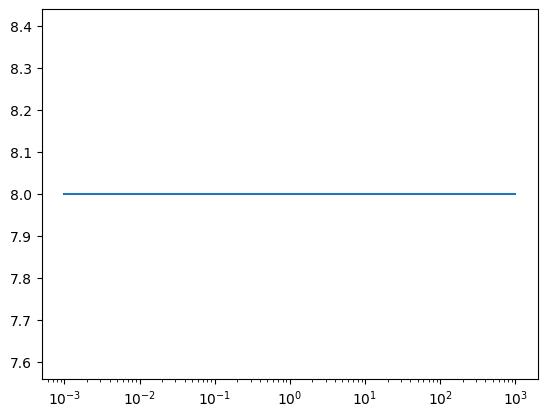

In [160]:
plt.semilogx(alpha, l2) 

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [161]:
from sklearn.metrics import mean_absolute_error

In [162]:
model = Ridge()
model = model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("RMSE train = ", mean_squared_error(y_train, y_train_pred) ** 0.5)
print("RMSE test = ", mean_squared_error(y_test, y_test_pred) ** 0.5)

print("MAE train = ", mean_absolute_error(y_train, y_train_pred))
print("MAE test = ", mean_absolute_error(y_test, y_test_pred))

print("R2 train = ", model.score(X_train, y_train))
print("R2 test = ", model.score(X_test, y_test))

RMSE train =  33.278884005470665
RMSE test =  34.51741400217476
MAE train =  17.434092638410693
MAE test =  17.789440544512633
R2 train =  0.13670635464719694
R2 test =  0.10930738325653355


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

In [163]:
from sklearn.model_selection import GridSearchCV, KFold

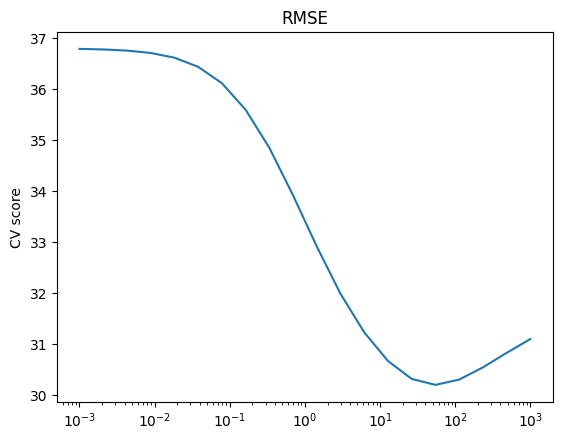

best_alpha = 54.555947811685144
RMSE train =  34.41069013128315
RMSE test =  35.3879655753297
MAE train =  18.3415989245216
MAE test =  18.470944953138115
R2 train =  0.13670635464719694
R2 test =  0.10930738325653355


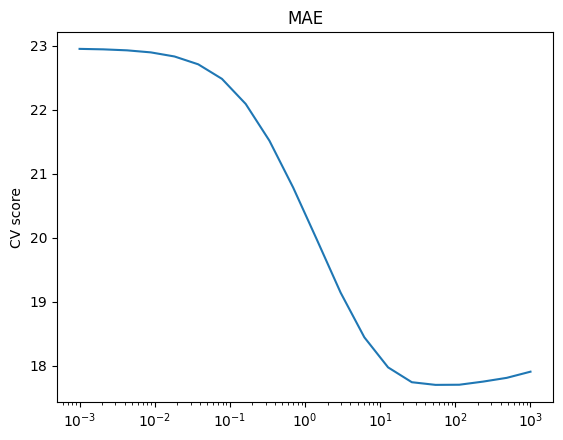

best_alpha = 54.555947811685144
RMSE train =  34.41069013128315
RMSE test =  35.3879655753297
MAE train =  18.3415989245216
MAE test =  18.470944953138115
R2 train =  0.13670635464719694
R2 test =  0.10930738325653355


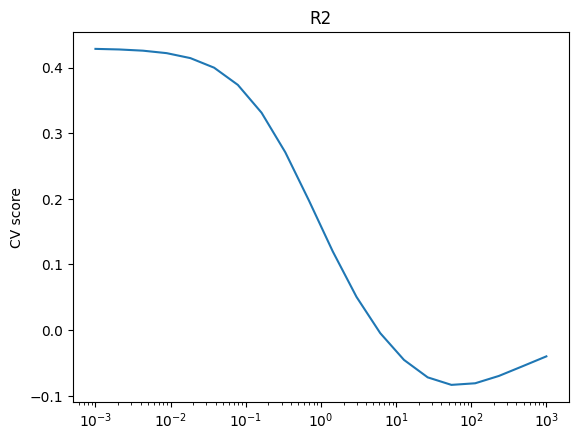

best_alpha = 54.555947811685144
RMSE train =  34.41069013128315
RMSE test =  35.3879655753297
MAE train =  18.3415989245216
MAE test =  18.470944953138115
R2 train =  0.13670635464719694
R2 test =  0.10930738325653355


In [165]:
alphas = 10 ** np.linspace(-3, 3, 20)

q = 1000
X_q_train, y_q_train = X_train[:q], y_train[:q]

scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2']
title = ['RMSE', 'MAE', 'R2']
cv = KFold(n_splits = 5)

for i in range(3):
    gridsearch = GridSearchCV(Ridge(), [{'alpha': alphas}], scoring = scoring[i], cv = cv)
    
    gridsearch.fit(X_q_train, y_q_train)
    best_alpha = gridsearch.best_params_['alpha']

    plt.semilogx(alphas, -gridsearch.cv_results_["mean_test_score"])
    plt.xscale("log")
    plt.ylabel("CV score")
    plt.title(title[i])
    plt.show()
    
    model_ridge = Ridge(best_alpha)
    model_ridge.fit(X_q_train, y_q_train)
    y_train_pred = model_ridge.predict(X_train)
    y_test_pred = model_ridge.predict(X_test)
    
    RMSE_train = mean_squared_error(y_train, y_train_pred) ** 0.5
    RMSE_test = mean_squared_error(y_test, y_test_pred) ** 0.5

    MAE_train = mean_absolute_error(y_train, y_train_pred)
    MAE_test = mean_absolute_error(y_test, y_test_pred)

    R2_train = model.score(X_train, y_train)
    R2_test = model.score(X_test, y_test)
    
    print('best_alpha =', best_alpha)
    print("RMSE train = ", RMSE_train)
    print("RMSE test = ", RMSE_test)

    print("MAE train = ", MAE_train)
    print("MAE test = ", MAE_test)

    print("R2 train = ", R2_train)
    print("R2 test = ", R2_test)

__19. (0.5 балла)__ Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

In [166]:
from sklearn.model_selection import cross_val_predict

Text(0.5, 1.0, 'MSE')

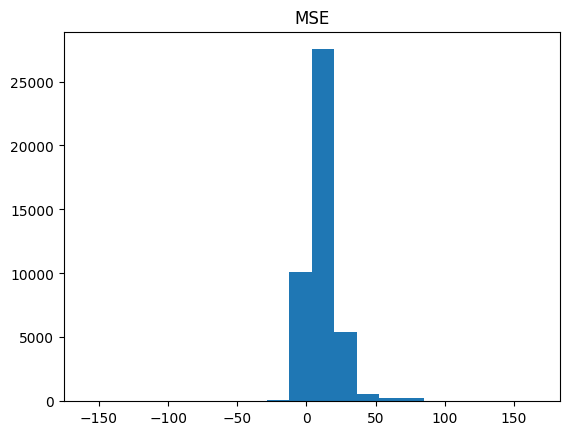

In [175]:
ridge = Ridge()
y_pred = cross_val_predict(model, X_train, y_train, cv = 5)
plt.hist(y_pred, bins=20)
plt.title("MSE")